In [1]:
import networkx as nx
G = nx.read_gpickle('..\\..\\data\\processed\\sp_graphs\\Grafo_Zonas_SP_Com_Idade.gpickle')


In [3]:
def subgraph_of_zone(G, zone, relation):
    zone_nodes = [x for x,y in G.nodes(data=True) if y[relation]==zone]
    G = G.subgraph(zone_nodes)
    return 
sub_G = subgraph_of_zone(G, 20, 'home')

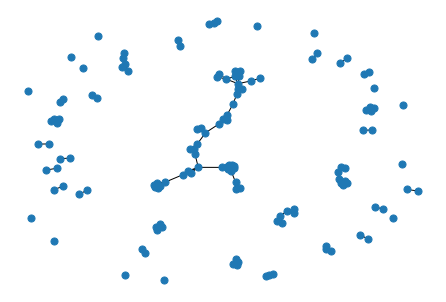

In [7]:
nx.draw(sub_G, node_size=50)

In [19]:
import networkx as nx
import plotly.graph_objects as go

def plot_graph(G):

    #pos = nx.spectral_layout(G)
    pos = nx.spring_layout(G)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))


    node_trace.text = [y for x,y in G.nodes(data=True)]

    fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),))
    fig.show()


In [20]:
plot_graph(sub_G)

In [27]:
plot_graph(G.subgraph(sorted(nx.connected_components(sub_G), key = len, reverse=True)[0]))

In [31]:
G = nx.read_gpickle('graph_SP_05_20.gpickle')


In [32]:
plot_graph(G.subgraph(sorted(nx.connected_components(sub_G), key = len, reverse=True)[0]))